In [1]:
import json


with open('oral_paper_by_topic.json') as json_file:
    oral_papers = json.load(json_file)
with open('poster_demo_paper_by_topic.json') as json_file:
    poster_demo_papers = json.load(json_file)

{'Machine Learning': ['Attending to Future Tokens for Bidirectional Sequence Generation (#1443)',
  'Attention is Not Not Explanation (#526)',
  'Practical Obstacles to Deploying Active Learning (#1176)',
  'Transfer Learning Between Related Tasks Using Expected Label Proportions (#1207)',
  'Insertion-based Decoding with automatically Inferred Generation Order (#TACL-1732)',
  'Are We Modeling the Task or the Annotator? An Investigation of Annotator Bias in Natural Language Understanding Datasets (#1092)',
  'Robust Text Classifier on Test-Time Budgets (#1128)',
  'Commonsense Knowledge Mining from Pretrained Models (#3289)',
  'RNN Architecture Learning with Sparse Regularization (#3428)',
  'Universal Trigger Sequences for Attacking and Analyzing NLP (#1515)',
  'To Annotate or Not? Unsupervised Prediction of Performance Drop due to Domain Shift (#2756)',
  'Adaptively Sparse Transformers (#2900)',
  'Show Your Work: Improved Reporting of Experimental Results (#3277)',
  'A Deep Fac

In [72]:
from collections import Counter
import re

counter = Counter()

for sess in [oral_papers, poster_demo_papers]:
    splited = []
    for k in sess.keys():
        splited.extend(re.split(r' |-|\'|,|;|:|\(|\)|\?|\!|\n', k.lower()))
        for title in sess[k]:
            for word in title.split()[:-1]:
                splited.extend(re.split(r' |-|\'|,|;|:|\(|\)|\?|\!|\n', word.lower()))
    counter.update(splited)        

In [73]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_deep_learning = [
    '', 'learning', 'network', 'neural', 'networks', 'deep', 'via', 'using',
    'text', 'language', 'model', 'models', 'based'
]

keywords = []
for w in counter.most_common():
    if w[0] not in stopwords.words('english') and w[0] not in stopwords_deep_learning:
        keywords.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joohong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
keywords[:10]

[('generation', 71),
 ('multi', 58),
 ('machine', 49),
 ('knowledge', 49),
 ('classification', 46),
 ('cross', 45),
 ('translation', 44),
 ('semantic', 42),
 ('domain', 39),
 ('attention', 38)]

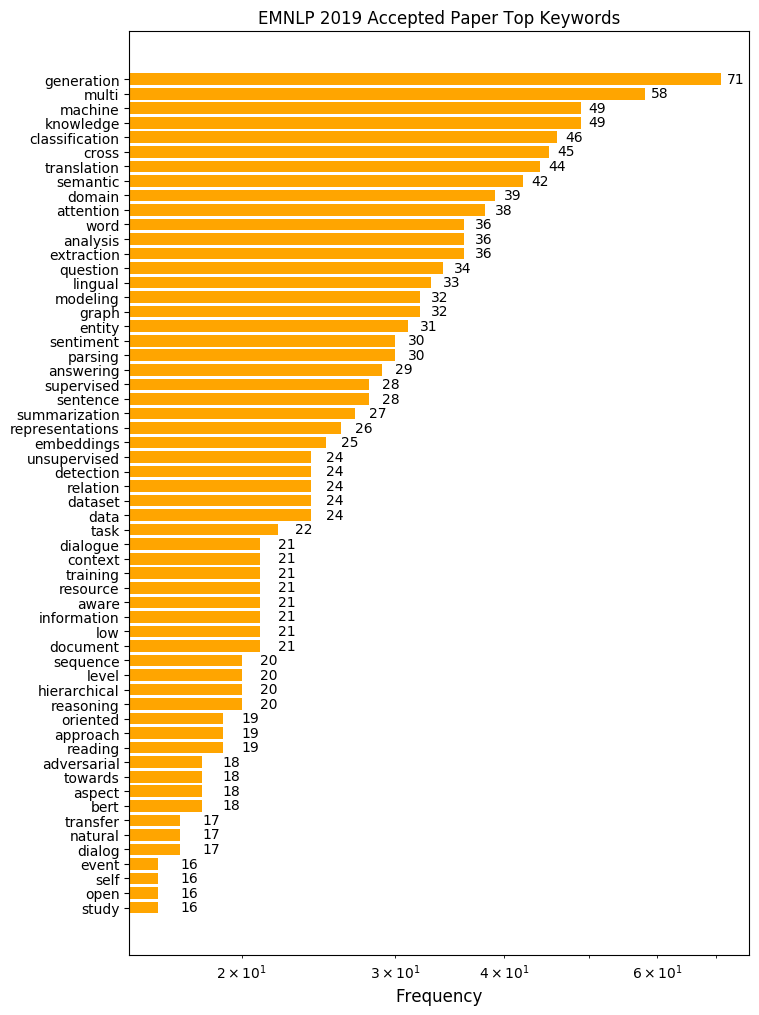

In [101]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 12))

top_k = 58
key = [k[0] for k in keywords[:top_k]] 
value = [k[1] for k in keywords[:top_k]] 
y_pos = np.arange(len(key))

ax.barh(y_pos, value, align='center', color='orange', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 

for i, v in enumerate(value):
    ax.text(v + 1, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_title('EMNLP 2019 Accepted Paper Top Keywords', fontsize=12)

plt.show()

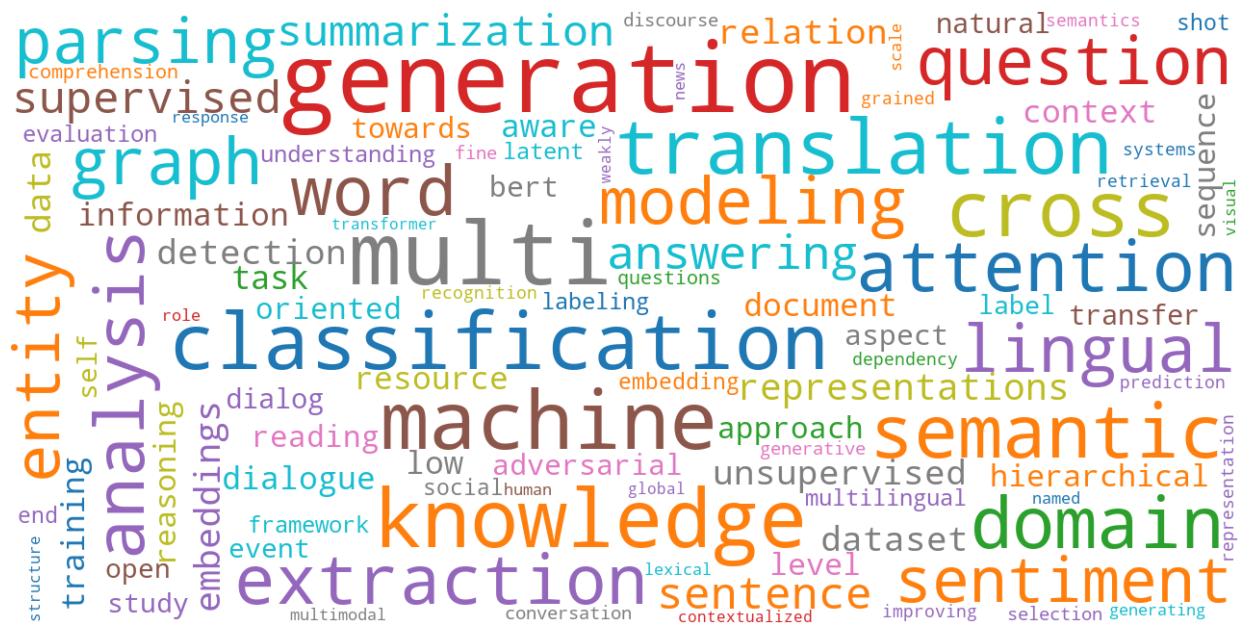

In [100]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100, max_words=100, 
                      width=1280, height=640, colormap='tab10',
                      background_color="white").generate_from_frequencies(dict(keywords))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()